In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('social media influencers - instagram.csv')

In [3]:
df

,Influencer insta name,instagram name,category_1,category_2,Followers,Audience country(mostly),Authentic engagement\r\n,Engagement avg\r\n
0,433,433,Sports with a ball,NaN,48.5M,Spain,383.1K,637K
1,__youngbae__,TAEYANG,Music,NaN,12.7M,Indonesia,478K,542.3K
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,310.8K,377.9K
3,_imyour_joy,Joy,Lifestyle,NaN,13.5M,Indonesia,1.1M,1.4M
4,_jeongjaehyun,Jaehyun,NaN,NaN,11.1M,Indonesia,2.5M,3.1M
...,...,...,...,...,...,...,...,...
995,zendaya,Zendaya,Cinema & Actors/actresses,Fashion,136.1M,United States,6.4M,8.6M
996,zidane,zidane,Sports with a ball,NaN,31.2M,Spain,546K,744.1K
997,zkdlin,KAI,Music,NaN,13.9M,Indonesia,1.3M,1.6M
998,zoeisabellakravitz,Zoë Kravitz,Cinema & Actors/actresses,NaN,8.2M,United States,583K,885.5K


In [4]:
df.head()

,Influencer insta name,instagram name,category_1,category_2,Followers,Audience country(mostly),Authentic engagement\r\n,Engagement avg\r\n
0,433,433,Sports with a ball,NaN,48.5M,Spain,383.1K,637K
1,__youngbae__,TAEYANG,Music,NaN,12.7M,Indonesia,478K,542.3K
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,310.8K,377.9K
3,_imyour_joy,Joy,Lifestyle,NaN,13.5M,Indonesia,1.1M,1.4M
4,_jeongjaehyun,Jaehyun,NaN,NaN,11.1M,Indonesia,2.5M,3.1M


In [5]:
df.tail()

,Influencer insta name,instagram name,category_1,category_2,Followers,Audience country(mostly),Authentic engagement\r\n,Engagement avg\r\n
995,zendaya,Zendaya,Cinema & Actors/actresses,Fashion,136.1M,United States,6.4M,8.6M
996,zidane,zidane,Sports with a ball,NaN,31.2M,Spain,546K,744.1K
997,zkdlin,KAI,Music,NaN,13.9M,Indonesia,1.3M,1.6M
998,zoeisabellakravitz,Zoë Kravitz,Cinema & Actors/actresses,NaN,8.2M,United States,583K,885.5K
999,zoesugg,Zoë Sugg,Lifestyle,Business & Careers,9.4M,United Kingdom,208.7K,289.3K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Influencer insta name     1000 non-null   object
 1   instagram name            979 non-null    object
 2   category_1                892 non-null    object
 3   category_2                287 non-null    object
 4   Followers                 1000 non-null   object
 5   Audience country(mostly)  986 non-null    object
 6   Authentic engagement
    1000 non-null   object
 7   Engagement avg
          1000 non-null   object
dtypes: object(8)
memory usage: 62.6+ KB


In [7]:
df.shape

(1000, 8)

CHECK FOR MISSING VALUES:

In [8]:
df.isnull().sum()

,0
Influencer insta name,0
instagram name,21
category_1,108
category_2,713
Followers,0
Audience country(mostly),14
Authentic engagement\r\n,0
Engagement avg\r\n,0


In [9]:
df.dtypes

,0
Influencer insta name,object
instagram name,object
category_1,object
category_2,object
Followers,object
Audience country(mostly),object
Authentic engagement\r\n,object
Engagement avg\r\n,object


DROPPING UNWANTED COLUMNS:

In [10]:
df = df.drop(['Influencer insta name', 'instagram name', 'Audience country(mostly)'],axis='columns')

In [11]:
df.head()

,category_1,category_2,Followers,Authentic engagement\r\n,Engagement avg\r\n
0,Sports with a ball,NaN,48.5M,383.1K,637K
1,Music,NaN,12.7M,478K,542.3K
2,Shows,NaN,18.8M,310.8K,377.9K
3,Lifestyle,NaN,13.5M,1.1M,1.4M
4,NaN,NaN,11.1M,2.5M,3.1M


In [13]:
df['category_2'].isnull().sum()

713

In [15]:
df = df.drop(['category_2'],axis=1)

In [16]:
df.head()

,category_1,Followers,Authentic engagement\r\n,Engagement avg\r\n
0,Sports with a ball,48.5M,383.1K,637K
1,Music,12.7M,478K,542.3K
2,Shows,18.8M,310.8K,377.9K
3,Lifestyle,13.5M,1.1M,1.4M
4,NaN,11.1M,2.5M,3.1M


**LABEL ENCODING**

In [19]:
# Remove 'M' and 'K' from the 'Authentic engagement' and 'Engagement avg' columns and convert to numeric values
df['Authentic engagement'] = df['Authentic engagement\r\n'].replace({'M': '*1e6', 'K': '*1e3'}, regex=True)
df['Engagement avg'] = df['Engagement avg\r\n'].replace({'M': '*1e6', 'K': '*1e3'}, regex=True)

# Convert the columns to numeric using eval
df['Authentic engagement'] = df['Authentic engagement'].apply(lambda x: eval(str(x)))
df['Engagement avg'] = df['Engagement avg'].apply(lambda x: eval(str(x)))

# Drop the old columns with unwanted characters
df = df.drop(columns=['Authentic engagement\r\n', 'Engagement avg\r\n'])

# Display the cleaned dataframe
df.head()


,category_1,Followers,Authentic engagement,Engagement avg
0,Sports with a ball,48500000.0,383100.0,637000.0
1,Music,12700000.0,478000.0,542300.0
2,Shows,18800000.0,310800.0,377900.0
3,Lifestyle,13500000.0,1100000.0,1400000.0
4,NaN,11100000.0,2500000.0,3100000.0


In [20]:
df.isnull().sum()

,0
category_1,108
Followers,0
Authentic engagement,0
Engagement avg,0


In [25]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'category_1' column
df['category_1'] = label_encoder.fit_transform(df['category_1'].fillna('Unknown'))

# Display the dataframe to check
df.head()


,category_1,Followers,Authentic engagement,Engagement avg
0,30,48500000.0,383100.0,637000.0
1,24,12700000.0,478000.0,542300.0
2,29,18800000.0,310800.0,377900.0
3,18,13500000.0,1100000.0,1400000.0
4,31,11100000.0,2500000.0,3100000.0


<Axes: xlabel='Followers', ylabel='count'>

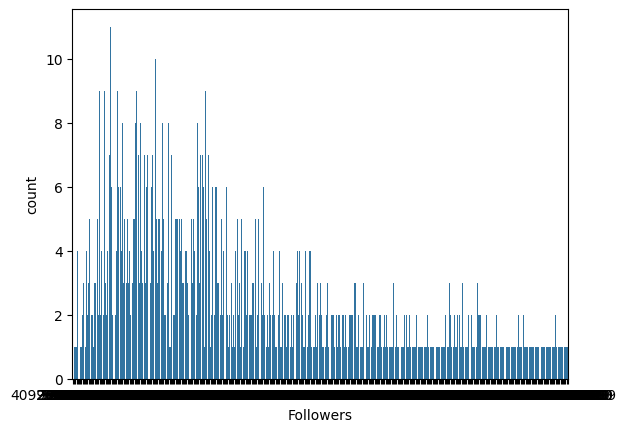

In [29]:
sns.countplot(x='Followers',data=df)

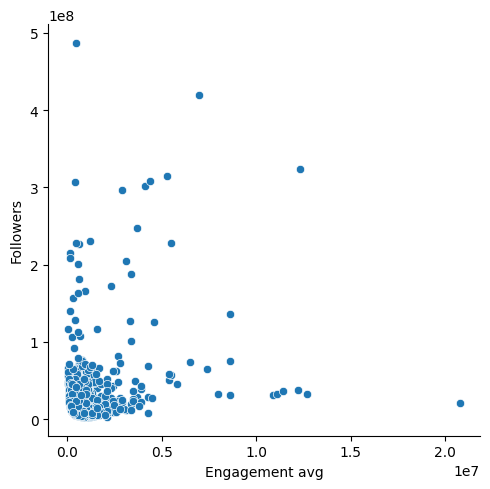

In [35]:
# Scatter plot with customized appearance
sns.relplot(x='Engagement avg', y='Followers', data=df)

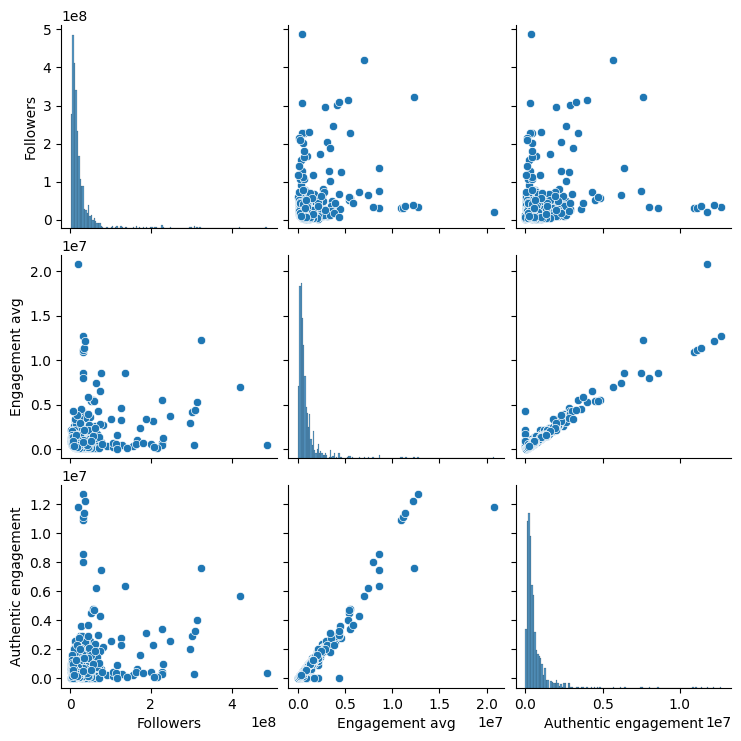

In [38]:
df_subset = df[['Followers', 'Engagement avg','Authentic engagement']]

# Create a pairplot
sns.pairplot(df_subset)

<Axes: >

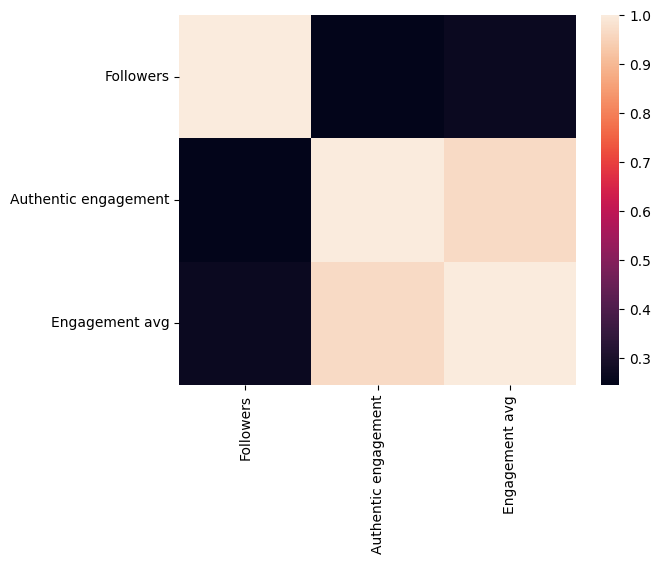

In [40]:
correlation_matrix = df[['Followers', 'Authentic engagement', 'Engagement avg']].corr()
sns.heatmap(correlation_matrix)

In [41]:
df['Engagement rate'] = df['Authentic engagement'] / df['Followers']


In [42]:
df['Engagement rate']

,Engagement rate
0,0.007899
1,0.037638
2,0.016532
3,0.081481
4,0.225225
...,...
995,0.047024
996,0.017500
997,0.093525
998,0.071098


In [45]:
# Remove duplicate rows
df = df.drop_duplicates()


In [47]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Calculate the cosine similarity between influencers (including self-similarity)
cosine_sim = cosine_similarity(df_scaled)

# Example: Get similar influencers for the first influencer (index 0)
similar_influencers = cosine_sim[0]

# Exclude self-similarity (first value) and sort by similarity (descending)
similar_influencers_sorted = np.argsort(similar_influencers)[::-1][1:]

# Print top 5 similar influencers (excluding the first influencer)
print("Top 5 Similar Influencers:")
for i in similar_influencers_sorted[:5]:
    print(f"Influencer {df['category_1'].iloc[i]} - Similarity: {similar_influencers[i]:.2f}")


Top 5 Similar Influencers:
Influencer 24 - Similarity: 1.00
Influencer 7 - Similarity: 1.00
Influencer 23 - Similarity: 1.00
Influencer 15 - Similarity: 1.00
Influencer 7 - Similarity: 1.00


In [48]:
# Check basic statistics of the data
print(df[['Followers', 'Engagement avg']].describe())


          Followers  Engagement avg
count  1.000000e+03    1.000000e+03
mean   2.571620e+07    9.221015e+05
std    4.102903e+07    1.452897e+06
min    2.600000e+06    3.330000e+04
25%    9.000000e+06    3.148750e+05
50%    1.455000e+07    5.337500e+05
75%    2.652500e+07    9.601500e+05
max    4.872000e+08    2.080000e+07
